# import

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Linear Regression으로 데이터 생성 + 모델 만들어 결과 출력하기

이번 과제에서 만들어볼 모델은 수학점수(y)을 예측해보는 것이다.

1.   feature가 1개일 때 (공부한 시간)
2.   feature가 2개 이상 (공부한 시간, 게임한 시간 ) 




# 1) feature가 1개일 때

## 선형회귀

In [2]:
np.random.seed(42)
X = 3 * np.random.rand(100, 1) # 공부 시간
y = 70 + 6 * X + np.random.randn(100, 1) 

그림 저장: generated_data_plot


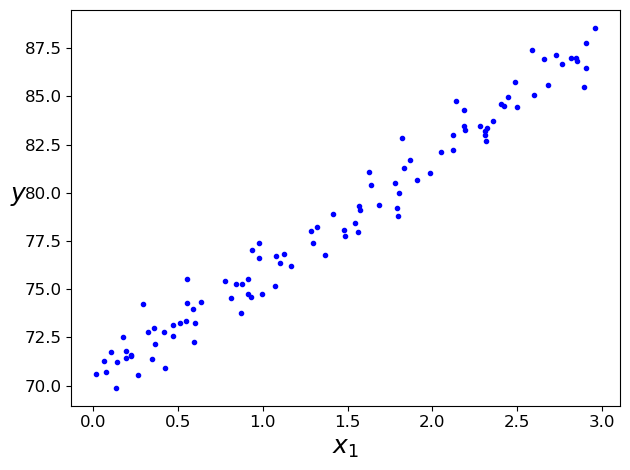

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

save_fig("generated_data_plot")
plt.show()

In [4]:
print(X)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [5]:
X_b = np.c_[np.ones((100, 1)), X] ## 상수항 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
X_b

array([[1.        , 1.12362036],
       [1.        , 2.85214292],
       [1.        , 2.19598183],
       [1.        , 1.79597545],
       [1.        , 0.46805592],
       [1.        , 0.46798356],
       [1.        , 0.17425084],
       [1.        , 2.59852844],
       [1.        , 1.80334504],
       [1.        , 2.12421773],
       [1.        , 0.06175348],
       [1.        , 2.90972956],
       [1.        , 2.49732792],
       [1.        , 0.63701733],
       [1.        , 0.5454749 ],
       [1.        , 0.55021353],
       [1.        , 0.91272673],
       [1.        , 1.57426929],
       [1.        , 1.29583506],
       [1.        , 0.87368742],
       [1.        , 1.83555868],
       [1.        , 0.41848158],
       [1.        , 0.87643395],
       [1.        , 1.09908553],
       [1.        , 1.36820995],
       [1.        , 2.35552788],
       [1.        , 0.59902135],
       [1.        , 1.54270332],
       [1.        , 1.77724371],
       [1.        , 0.13935124],
       [1.

In [7]:
theta_best

array([[70.21509616],
       [ 5.84674226]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [8]:
X_new = np.array([[0], [3]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[70.21509616],
       [87.75532293]])

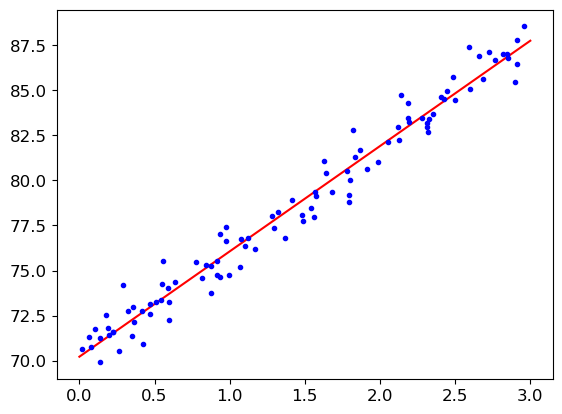

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression ## 사이킷런으로 간편히 가능

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([70.21509616]), array([[5.84674226]]))

In [11]:
lin_reg.predict(X_new)

array([[70.21509616],
       [87.75532293]])

## 경사 하강법


### 배치 경사 하강법

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [12]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 위의 식과 동일
    theta = theta - eta * gradients

In [13]:
theta 

array([[70.21509616],
       [ 5.84674226]])

In [14]:

X_new_b.dot(theta) 

array([[70.21509616],
       [87.75532293]])

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

/var/folders/b7/4zry0pd57ms8x6tx9znwjtyh0000gn/T/ipykernel_43758/2906019347.py:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


그림 저장: gradient_descent_plot


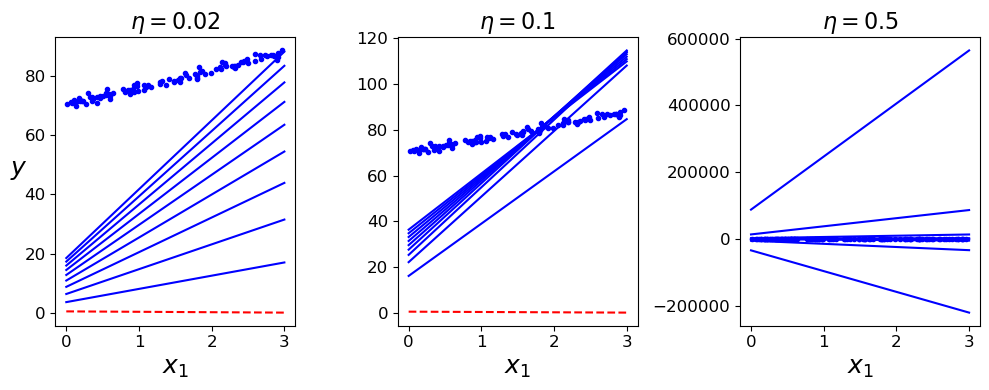

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

### 확률적 경사 하강법

In [17]:
## 
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)


그림 저장: sgd_plot


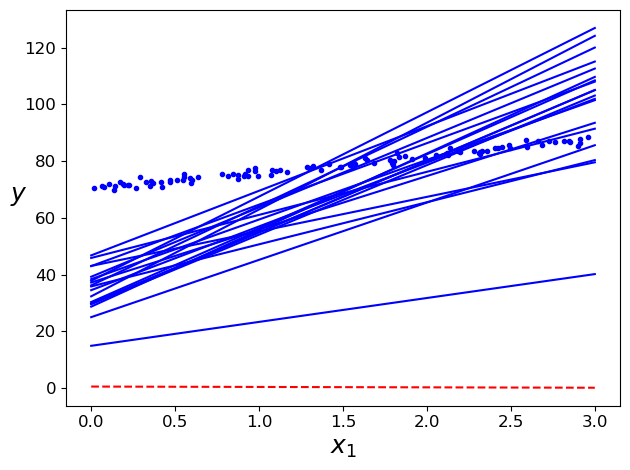

In [18]:
n_epochs = 50
t0, t1 = 5, 50  

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)    
                             
save_fig("sgd_plot")                               
plt.show()                                           

In [19]:
theta

array([[70.21193173],
       [ 5.82108203]])

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([70.19211291]), array([5.82204703]))

### 미니배치 경사 하강법

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[70.30998046],
       [ 5.95202443]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [25]:
theta_path_mgd[0:4]

array([[[32.10851209],
        [50.23617185]],

       [[26.17327327],
        [27.01803103]],

       [[29.60988698],
        [26.50434835]],

       [[35.69577112],
        [28.28977342]]])

그림 저장: gradient_descent_paths_plot


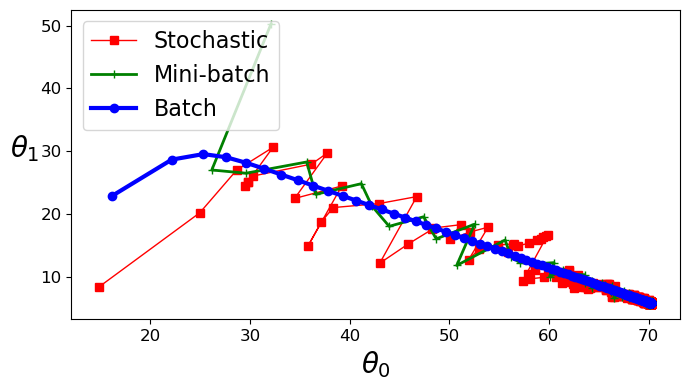

In [26]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
save_fig("gradient_descent_paths_plot")
plt.show()

## 다항 회귀

In [27]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [28]:
X = 3 * np.random.rand(100, 1) # 공부 시간
y = 70 + 2*X**2+ X + np.random.randn(100, 1) 

그림 저장: quadratic_data_plot


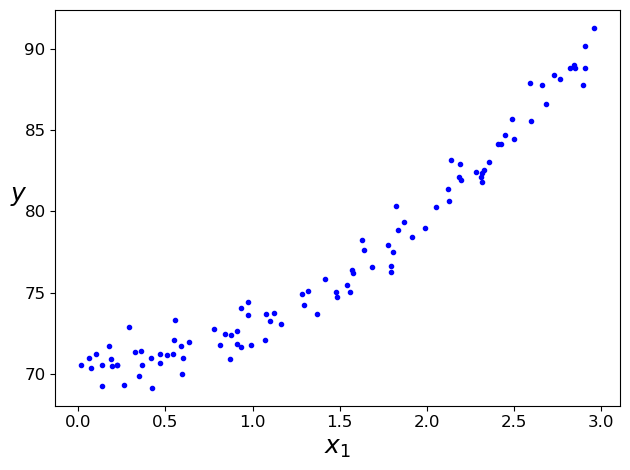

In [29]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
save_fig("quadratic_data_plot")
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.12362036])

In [31]:
X_poly[0]

array([1.12362036, 1.26252271])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([70.56140272]), array([[0.09258626, 2.25825053]]))

그림 저장: quadratic_predictions_plot


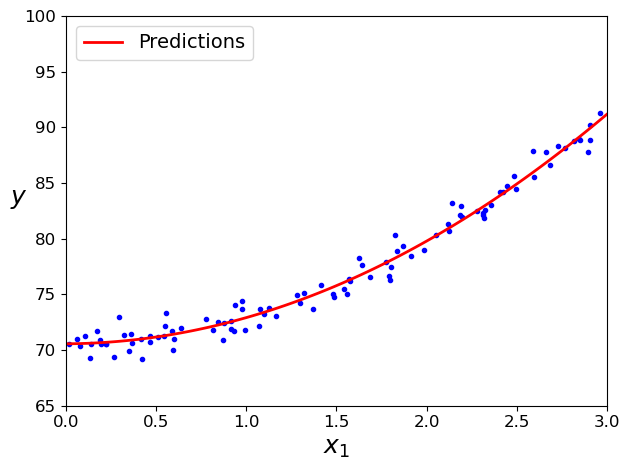

In [33]:
X_new=np.linspace(0, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 3, 65, 100])
save_fig("quadratic_predictions_plot")
plt.show()

그림 저장: high_degree_polynomials_plot


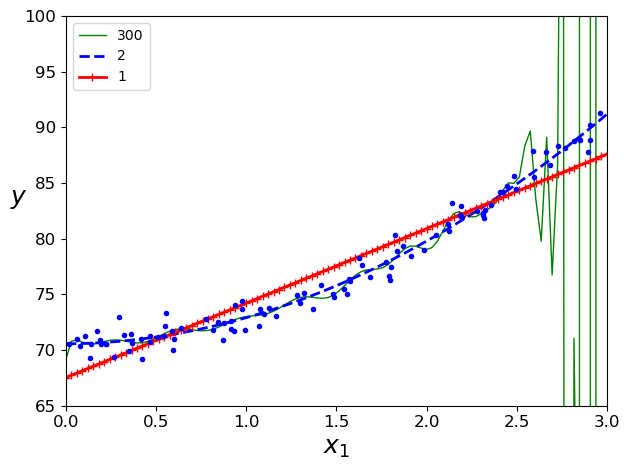

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 65, 100])
save_fig("high_degree_polynomials_plot")
plt.show()

## 학습 곡선

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

그림 저장: underfitting_learning_curves_plot


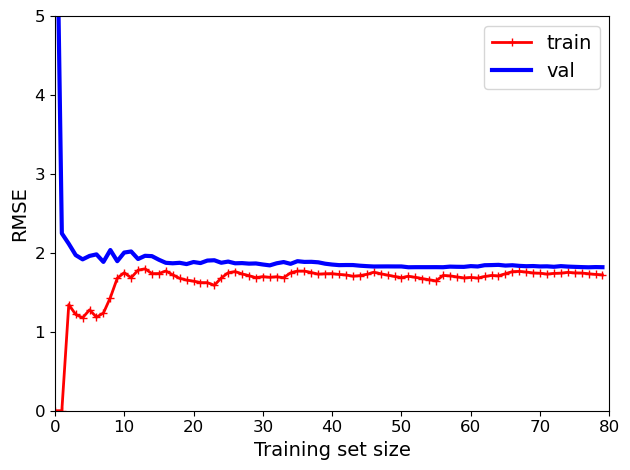

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y) 
plt.axis([0, 80, 0, 5])               
save_fig("underfitting_learning_curves_plot")   
plt.show()                                      

그림 저장: learning_curves_plot


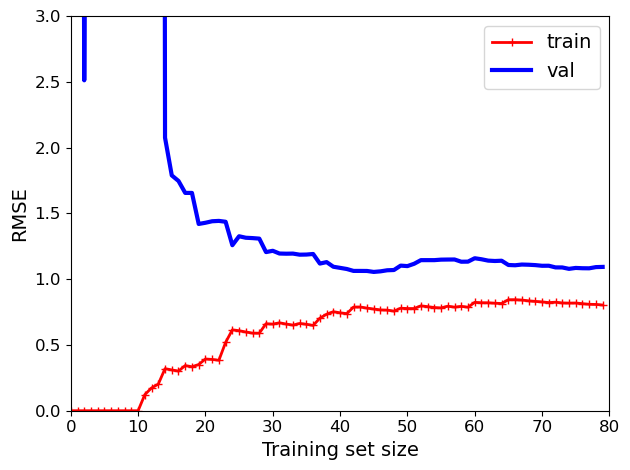

In [37]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()                        

# 2) feature가 2개일 때

## 선형회귀

In [38]:
np.random.seed(42)
X1 = 3*np.random.rand(100, 1) # 공부 시간
X2 = 3*np.random.rand(100, 1) # 게임한 시간
y = 70 +2*X1 -2.5*X2 + np.random.randn(100, 1) 

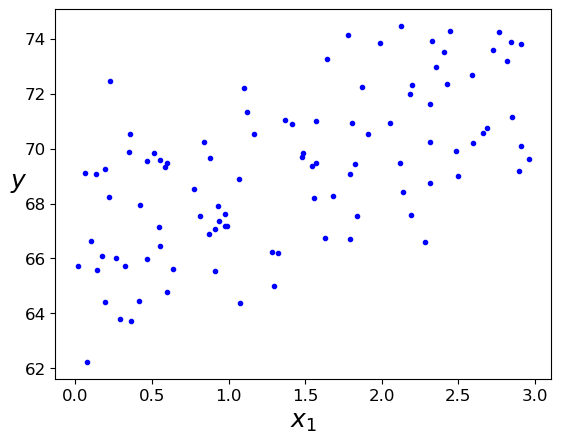

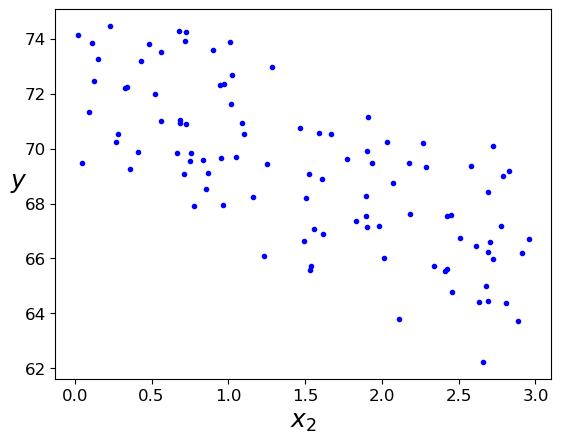

In [39]:
plt.plot(X1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.figure() 
plt.plot(X2, y, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.show()



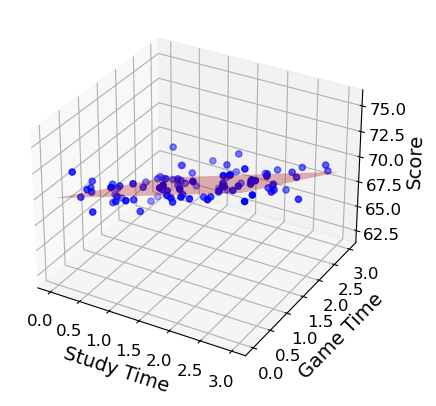

In [40]:
## normal equation으로 fitting하여 3D Plot 생성
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X_b = np.c_[np.ones((100, 1)), X1, X2] # 상수항 추가
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 모델 학습

# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='b', marker='o')

# regression line
x1 = np.linspace(0, 3, 10)
x2 = np.linspace(0, 3, 10)
X1, X2 = np.meshgrid(x1, x2)
Z = theta[0][0] + theta[1][0] * X1 + theta[2][0] * X2
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=0.3, color = 'red')

ax.set_xlabel('Study Time')
ax.set_ylabel('Game Time')
ax.set_zlabel('Score')

plt.show()


**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [41]:
np.random.seed(42)
X1 = 3*np.random.rand(100, 1) # 공부 시간
X2 = 3*np.random.rand(100, 1) # 게임한 시간
y = 70 +2*X1 -2.5*X2 + np.random.randn(100, 1) 

In [42]:
X_b = np.c_[np.ones((100, 1)), X1, X2]  ## 상수항 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [43]:
X_b

array([[1.        , 1.12362036, 0.09428756],
       [1.        , 2.85214292, 1.90923123],
       [1.        , 2.19598183, 0.94306794],
       [1.        , 1.79597545, 1.52571207],
       [1.        , 0.46805592, 2.72269942],
       [1.        , 0.46798356, 0.74787669],
       [1.        , 0.17425084, 1.23114877],
       [1.        , 2.59852844, 2.26665342],
       [1.        , 1.80334504, 0.6863945 ],
       [1.        , 2.12421773, 0.23093973],
       [1.        , 0.06175348, 0.86925436],
       [1.        , 2.90972956, 0.48366386],
       [1.        , 2.49732792, 2.78909296],
       [1.        , 0.63701733, 2.42436114],
       [1.        , 0.5454749 , 1.90021127],
       [1.        , 0.55021353, 2.61438177],
       [1.        , 0.91272673, 2.41101623],
       [1.        , 1.57426929, 0.55971018],
       [1.        , 1.29583506, 2.677677  ],
       [1.        , 0.87368742, 1.61802673],
       [1.        , 1.83555868, 2.42232047],
       [1.        , 0.41848158, 2.6882739 ],
       [1.

In [44]:
theta_best

array([[69.91061004],
       [ 1.88609156],
       [-2.26022953]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [45]:
X_new = np.array([[2,3], [4,5]]) # 먼저 X_new 생성 후
X_new_b = np.c_[np.ones((2, 1)), X_new] # bias 포함시키기  
y_predict = X_new_b.dot(theta_best)
y_predict

array([[66.90210457],
       [66.15382863]])

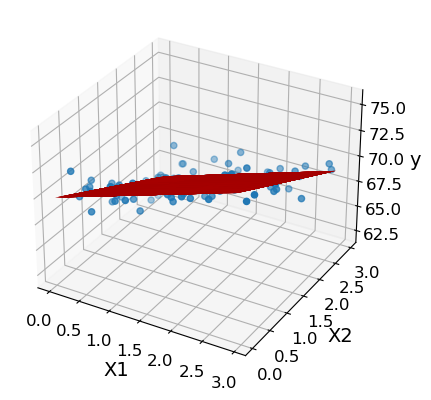

In [46]:
# X_new 활용하여 fitting 후 plot생성
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
np.random.seed(42)
X1 = 3*np.random.rand(100, 1)
X2 = 3*np.random.rand(100, 1)
y = 70 +2*X1 -2.5*X2 + np.random.randn(100, 1)

# design matrix 생성
X_b = np.c_[np.ones((100, 1)), X1, X2]

# 파라미터 학습
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)

# 예측 값 계산
X_new = np.array([[1, 2, 3], [1, 4, 5]])
y_new = X_new.dot(theta)

# 평면 추가
x1, x2 = np.meshgrid(X1, X2)
y_pred = theta[0] + theta[1]*x1 + theta[2]*x2
ax.plot_surface(x1, x2, y_pred, color='red', alpha=0.5)

# 축 레이블 설정
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

# 플롯 출력
plt.show()



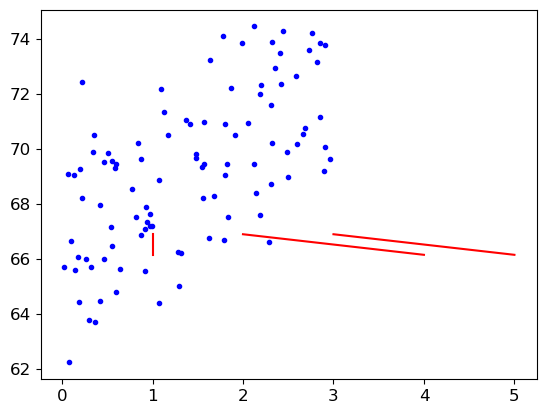

In [47]:
# 강의안 코드
# 강의안 코드
plt.plot(X_new, y_predict, "r-")
plt.plot(X1, y, "b.")
plt.show()

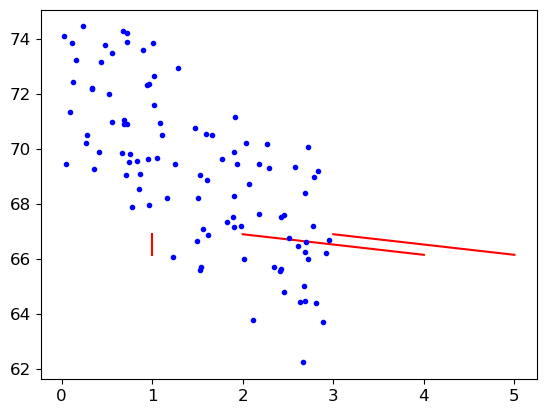

In [48]:
# 강의안 코드
plt.plot(X_new, y_predict, "r-")
plt.plot(X2, y, "b.")
plt.show()

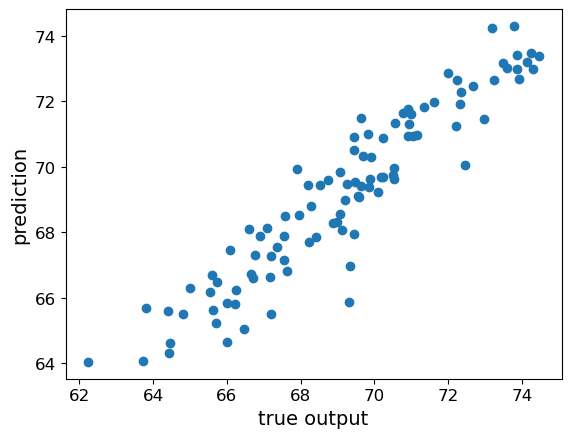

In [49]:
y_pred = X_b.dot(theta_best)
plt.figure() 
plt.xlabel('true output')
plt.ylabel('prediction')
plt.scatter(y, y_pred) ## y 대비 prediction y plot

In [50]:
from sklearn.linear_model import LinearRegression ## 사이킷런으로 간편히 가능

np.random.seed(42)
X1 = 3 * np.random.rand(100, 1) # 공부 시간
X2 = 3 * np.random.rand(100, 1) # 게임한 시간
y = 70 + 2 * X1 - 2.5 * X2 + np.random.randn(100, 1) 

X_b = np.c_[np.ones((100, 1)), X1, X2] # 독립 변수를 합쳐줌

model = LinearRegression() # 모델 생성
model.fit(X_b, y) # 모델 학습

print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

Model Coefficients: [[ 0.          1.88609156 -2.26022953]]
Model Intercept: [69.91061004]


In [51]:
X_new_b = np.array([[1, 2, 3], [1, 4, 5]])  
y_new_b = model.predict(X_new_b)
print('Predicted value: ', y_new_b) ## 위의 normal equation으로 예측했을때와 같은 값이다.

Predicted value:  [[66.90210457]
 [66.15382863]]


## 경사 하강법


### 배치 경사 하강법

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


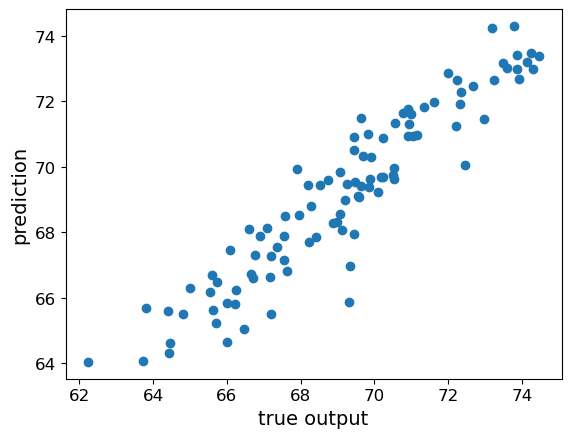

In [52]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(3,1)

for iteration in range(n_iterations):
    y_pred = X_b.dot(theta)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients



plt.figure() 
plt.xlabel('true output')
plt.ylabel('prediction')
plt.scatter(y, y_pred) ## y 대비 prediction y plot

In [53]:
theta

array([[69.91061004],
       [ 1.88609156],
       [-2.26022953]])

In [54]:
X_new_b.dot(theta) 

array([[66.90210457],
       [66.15382863]])

In [55]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X_b, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


/var/folders/b7/4zry0pd57ms8x6tx9znwjtyh0000gn/T/ipykernel_43758/1427272268.py:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


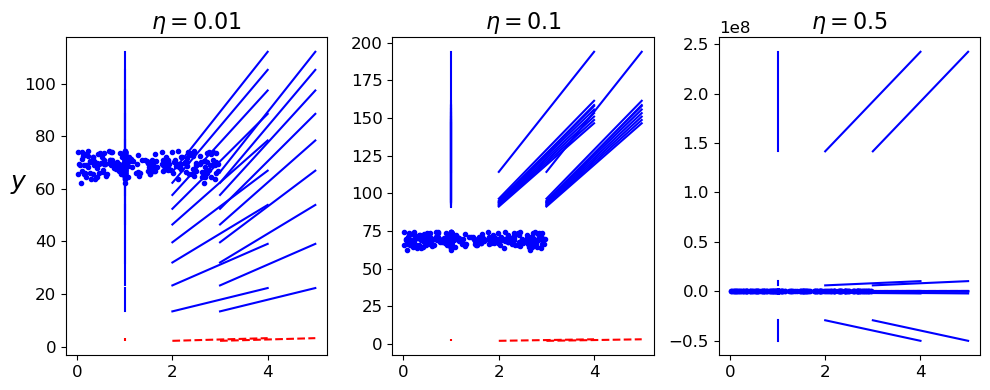

In [56]:
np.random.seed(42)
theta = np.random.randn(3,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.01)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

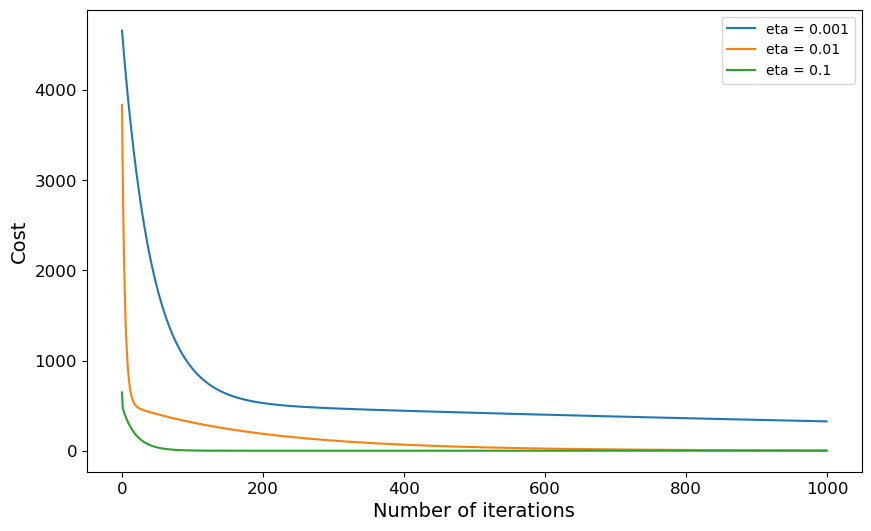

In [57]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X1 = 3 * np.random.rand(100, 1) # 공부 시간
X2 = 3 * np.random.rand(100, 1) # 게임한 시간
y = 70 + 2 * X1 - 2.5 * X2 + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X1, X2] # 상수항 추가
# 학습률
eta_vals = [0.001, 0.01, 0.1]

# 그래프 초기화
plt.figure(figsize=(10, 6))
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

# 배치 그래디언트 디센트
n_iterations = 1000
m = 100
theta = np.random.randn(3,1)  # 무작위 초기화

for eta in eta_vals:
    cost_history = []
    theta_history = []
    theta = np.random.randn(3,1)  # 무작위 초기화

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        cost = np.mean((X_b.dot(theta) - y)**2)
        cost_history.append(cost)
        theta_history.append(theta)

    plt.plot(cost_history, label=f'eta = {eta}')

plt.legend(loc='upper right')
plt.show()


### 확률적 경사 하강법

In [58]:
## 
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)


그림 저장: sgd_plot


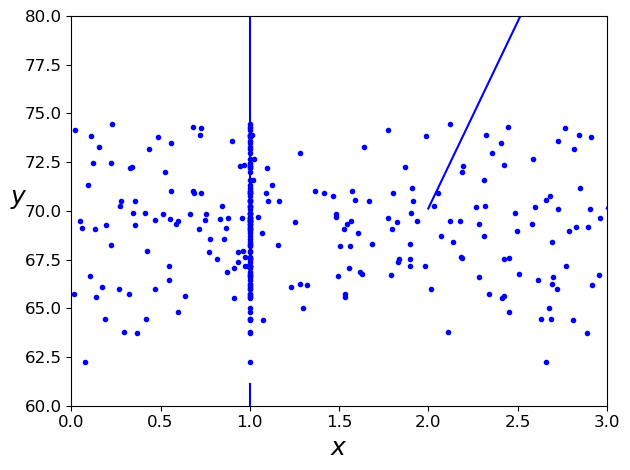

In [59]:
n_epochs = 50
t0, t1 = 5, 50  

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(3,1)

for epoch in range(n_epochs):
    for i in range(m):
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X_b, y, "b.")       
plt.axis([0, 3,60, 80])                              
plt.xlabel("$x$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)    
                             
save_fig("sgd_plot")                               
plt.show()                                           

In [60]:
theta

array([[69.76164514],
       [ 1.98656293],
       [-2.17844138]])

In [61]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_b, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [62]:
sgd_reg.intercept_, sgd_reg.coef_

(array([34.9279726]), array([34.9279726 ,  1.88957006, -2.20046448]))

### 미니배치 경사 하강법

In [63]:
theta_path_mgd = []


np.random.seed(42)
theta = np.random.randn(3, 1)  # 임의의 theta값으로 초기화
lr = 0.01  # 학습률
batch_size = 10  # 미니배치 크기
n_batches = int(np.ceil(m / batch_size))  # 미니배치의 개수
m = len(X_b)
n_iterations = 50

# 미니배치 경사 하강법
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, m)
        X_b_batch = X_b_shuffled[start_idx:end_idx]
        y_batch = y_shuffled[start_idx:end_idx]
        gradients = 2 / batch_size * X_b_batch.T.dot(X_b_batch.dot(theta) - y_batch)
        theta = theta - lr * gradients

        theta_path_mgd.append(theta)

## 강의안 코드는 수치가 너무 이상하게 나와 수정하였음.


In [64]:
theta

array([[53.60934248],
       [ 6.50326653],
       [ 2.79121273]])

In [65]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


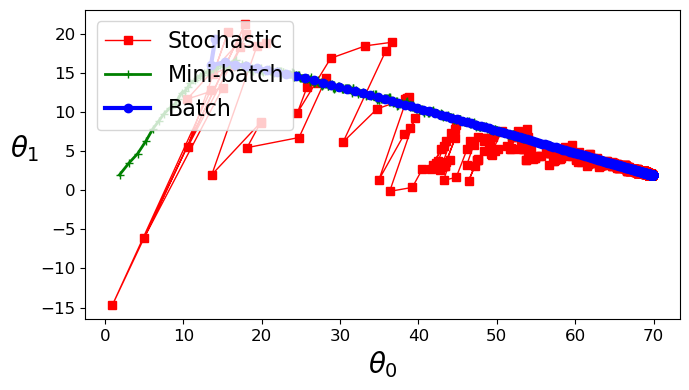

In [66]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
#plt.axis([0, 20, 0, 20])
save_fig("gradient_descent_paths_plot")
plt.show()

## 다항 회귀

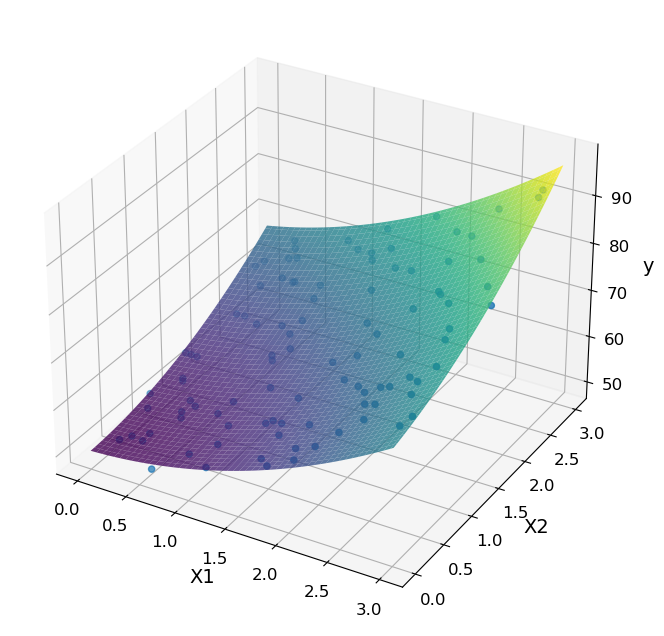

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### 다항 회귀 fitting까지 plot
np.random.seed(42)
X1 = 3*np.random.rand(100, 1) # 공부 시간
X2 = 3*np.random.rand(100, 1) # 게임한 시간
y = 50 + 2*X1**2+ X1 +1.5*X2**2+ X2+X1*X2+ np.random.randn(100, 1) 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(np.c_[X1, X2])

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# 산점도 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)

# 회귀선 그리기
xx, yy = np.meshgrid(np.linspace(0, 3, 100), np.linspace(0, 3, 100))
zz = lin_reg.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()]))
zz = zz.reshape(xx.shape)

ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.8, color = 'red')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()


그림 저장: quadratic_data_plot


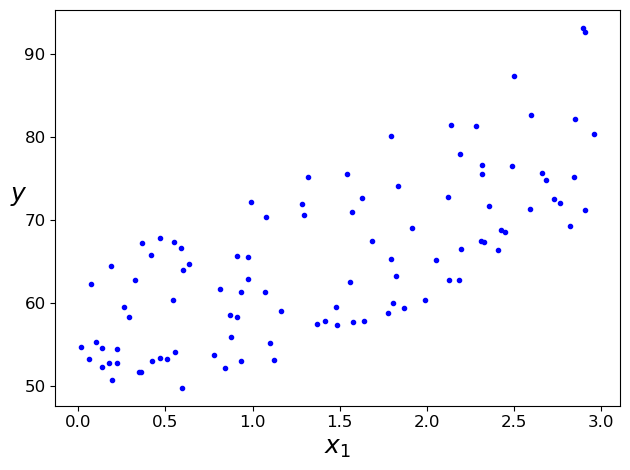

In [68]:
plt.plot(X1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
save_fig("quadratic_data_plot")
plt.show()

그림 저장: quadratic_data_plot


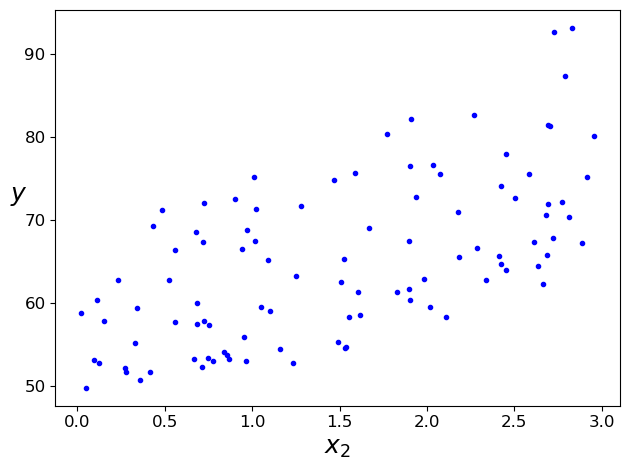

In [69]:
plt.plot(X2, y, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
save_fig("quadratic_data_plot")
plt.show()

In [70]:
X_poly[0]

array([1.12362036, 0.09428756, 1.26252271, 0.10594342, 0.00889014])

In [71]:
lin_reg.intercept_, lin_reg.coef_

(array([50.31092179]),
 array([[0.8324749 , 0.48677572, 2.0201702 , 1.00272132, 1.74639789]]))

그림 저장: high_degree_polynomials_plot


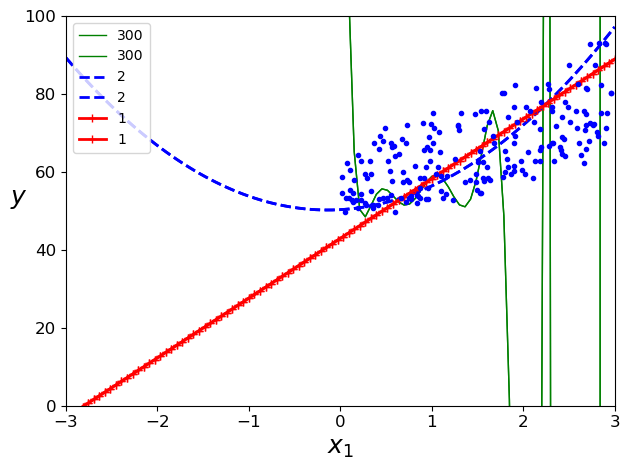

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X = np.hstack([X1, X2])
X1_new = np.linspace(-3, 3, 100).reshape(100, 1)
X2_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new = np.c_[X1_new, X2_new]

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -0,100])
save_fig("high_degree_polynomials_plot")
plt.show()

## 학습 곡선

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

그림 저장: underfitting_learning_curves_plot


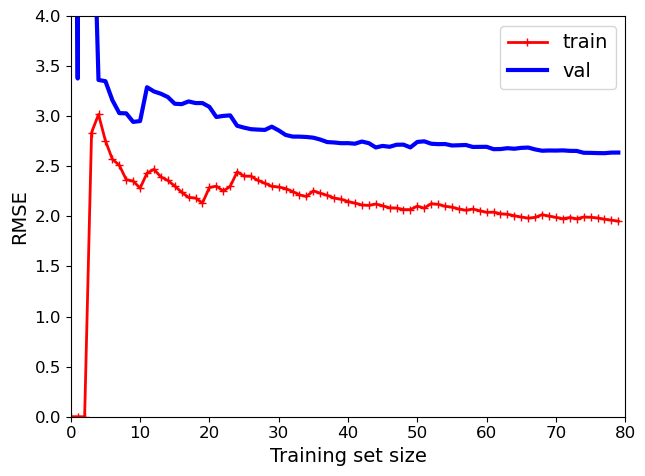

In [74]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)  
save_fig("underfitting_learning_curves_plot")  
plt.axis([0, 80, 0, 4]) 
plt.show()                                      

그림 저장: learning_curves_plot


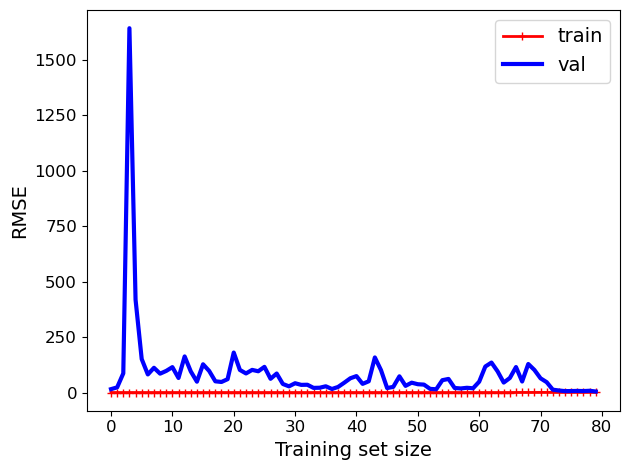

In [75]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
#plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()                        